In [1]:
import time
start_time = time.time()

In [2]:
! pip install xgboost
! pip install lightgbm

In [3]:
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''데이터 준비 관련 라이브러'''
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

'''알고리즘 관련 라이브러'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [4]:
DF = pd.read_csv('C:\WORK/creditcard-small.csv') 

In [5]:
DF.shape

(10000, 31)

In [6]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,121856,-0.798013,0.551563,0.298352,-1.177178,0.407970,0.573753,-0.113233,0.835812,0.122256,...,-0.183601,-0.747583,0.114157,-0.465602,-0.759242,0.193992,0.226457,0.139479,30.49,0
1,153129,2.150186,-0.013351,-2.427582,-0.005300,1.072451,-0.365440,0.501331,-0.233762,0.025978,...,0.080768,0.353176,-0.108631,-0.079116,0.467029,0.715756,-0.125935,-0.098291,0.76,0
2,102571,-1.239349,2.004216,-1.161894,1.881742,2.443267,2.091774,0.543269,1.220822,-0.629435,...,0.126396,0.567625,0.109872,-1.392423,-0.874859,-0.284468,0.107768,0.137407,15.16,0
3,45017,0.936182,-0.306992,0.284805,1.084374,-0.099940,0.490927,-0.109810,0.064514,0.230956,...,0.176250,0.281141,-0.301231,-0.911571,0.525721,-0.226498,0.034538,0.046433,156.90,0
4,63306,-1.361342,-0.914178,0.077355,-1.222296,-0.038197,0.572404,2.064487,-0.034138,-0.154245,...,0.179535,-0.281095,0.648892,-1.312771,0.346451,1.423783,-0.207629,0.089408,430.60,0


In [7]:
DF.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,93675.84660,-0.248341,0.157002,-0.349397,0.223827,-0.148883,-0.076911,-0.255179,0.039673,-0.097756,...,0.029208,0.010775,-0.000755,-0.002089,0.010464,0.005508,0.013065,0.006776,92.483138,0.049200
std,47184.69317,2.668948,2.109988,2.620512,1.790510,1.919517,1.410916,2.302023,1.910484,1.335787,...,1.111284,0.780954,0.653660,0.596132,0.528930,0.486653,0.501902,0.388621,231.874578,0.216296
min,73.00000,-41.928738,-40.803981,-31.103685,-5.175917,-22.105532,-17.282140,-43.557242,-50.943369,-13.434066,...,-22.797604,-8.887017,-21.303666,-2.706616,-4.781606,-1.732008,-7.263482,-8.412267,0.000000,0.000000
25%,53849.00000,-1.034333,-0.579530,-1.102279,-0.788918,-0.740356,-0.823602,-0.604998,-0.205451,-0.701302,...,-0.229563,-0.542167,-0.172222,-0.347645,-0.305502,-0.325900,-0.069842,-0.053088,5.000000,0.000000
50%,83553.00000,-0.047866,0.099893,0.103528,0.074882,-0.077328,-0.312979,0.021141,0.037441,-0.068625,...,-0.012532,0.020169,-0.018986,0.045113,0.036393,-0.049383,0.004408,0.013383,21.500000,0.000000
75%,138127.25000,1.284072,0.889202,0.989685,0.917360,0.603337,0.376822,0.550569,0.370021,0.579203,...,0.212958,0.548061,0.141545,0.431606,0.359572,0.247817,0.111673,0.087333,79.990000,0.000000
max,172775.00000,2.408046,22.057729,3.663646,12.114672,28.516513,13.373798,18.948236,20.007208,10.348407,...,27.202839,8.361985,12.122292,3.497675,3.119632,2.927144,6.943659,15.374949,4692.650000,1.000000


In [8]:
DF.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
print("Number of fraudulent transactions:", DF['Class'].sum())
print('% of fraudauient transactions:', np.round(DF['Class'].sum()/DF.shape[0]*100, 4))

Number of fraudulent transactions: 492
% of fraudauient transactions: 4.92


In [10]:
nmiss = np.isnan(DF).sum()
nmiss

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
ndistinct = DF.apply(lambda x : len(x.unique()))
ndistinct 

Time      9614
V1        9943
V2        9943
V3        9943
V4        9943
V5        9943
V6        9943
V7        9943
V8        9943
V9        9943
V10       9943
V11       9943
V12       9943
V13       9943
V14       9943
V15       9943
V16       9943
V17       9943
V18       9943
V19       9943
V20       9943
V21       9943
V22       9943
V23       9943
V24       9943
V25       9943
V26       9943
V27       9943
V28       9943
Amount    4206
Class        2
dtype: int64

In [12]:
DFX= DF.copy().drop(['Class'],axis=1)
DFy = DF['Class'].copy()

In [13]:
xnamesToScale = DFX.drop(['Time'],axis=1).columns
xnamesToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [14]:
Pstd = pp.StandardScaler(copy=True)
DFX.loc[:,xnamesToScale] = Pstd.fit_transform(DFX[xnamesToScale])
scalingFactors = pd.DataFrame(data=[Pstd.mean_,Pstd.scale_],index=['Mean','StDev'],columns=xnamesToScale)
scalingFactors.round(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,-0.248,0.157,-0.349,0.224,-0.149,-0.077,-0.255,0.04,-0.098,-0.275,...,0.021,0.029,0.011,-0.001,-0.002,0.010,0.006,0.013,0.007,92.483
StDev,2.669,2.110,2.620,1.790,1.919,1.411,2.302,1.91,1.336,1.939,...,0.838,1.111,0.781,0.654,0.596,0.529,0.487,0.502,0.389,231.863


In [15]:
DFX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,93675.84660,-1.065814e-17,5.684342e-18,-2.771117e-17,8.526513e-18,1.350031e-17,-7.993606e-18,6.039613e-18,-4.973799e-18,4.263256e-18,...,-4.973799e-18,9.237056e-18,-1.421085e-18,-2.131628e-18,1.847411e-17,1.563194e-17,1.350031e-17,7.105427e-19,-2.486900e-18,8.881784e-18
std,47184.69317,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,73.00000,-1.561757e+01,-1.941387e+01,-1.173657e+01,-3.015907e+00,-1.143921e+01,-1.219498e+01,-1.881138e+01,-2.668727e+01,-9.984358e+00,...,-2.240547e+01,-2.054196e+01,-1.139406e+01,-3.259184e+01,-4.537020e+00,-9.060387e+00,-3.570517e+00,-1.449866e+01,-2.166496e+01,-3.988698e-01
25%,53849.00000,-2.945097e-01,-3.490864e-01,-2.873177e-01,-5.656465e-01,-3.081520e-01,-5.292510e-01,-1.519693e-01,-1.283114e-01,-4.518502e-01,...,-2.760919e-01,-2.328687e-01,-7.080705e-01,-2.623313e-01,-5.796922e-01,-5.973983e-01,-6.810278e-01,-1.651924e-01,-1.540487e-01,-3.773053e-01
50%,83553.00000,7.511767e-02,-2.706696e-02,1.728468e-01,-8.318986e-02,3.727979e-02,-1.673237e-01,1.200397e-01,-1.168379e-03,2.180937e-02,...,-9.647216e-02,-3.756174e-02,1.202940e-02,-2.789092e-02,7.918501e-02,4.902523e-02,-1.128001e-01,-1.724952e-02,1.700293e-02,-3.061426e-01
75%,138127.25000,5.741924e-01,3.470335e-01,5.110256e-01,3.873573e-01,3.918998e-01,3.216033e-01,3.500347e-01,1.729218e-01,5.068123e-01,...,1.624816e-01,1.653581e-01,6.880206e-01,2.177082e-01,7.275520e-01,6.600609e-01,4.979330e-01,1.964785e-01,2.072993e-01,-5.388155e-02
max,172775.00000,9.953433e-01,1.038007e+01,1.531473e+00,6.641368e+00,1.493440e+01,9.533792e+00,8.342390e+00,1.045208e+01,7.820621e+00,...,1.611893e+01,2.445369e+01,1.069413e+01,1.854735e+01,5.871082e+00,5.878518e+00,6.003826e+00,1.380935e+01,3.954736e+01,1.984002e+01


In [16]:
DF.drop(['Class'], axis=1).corr().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.00,0.13,-0.05,-0.18,-0.12,0.19,-0.05,0.12,-0.05,0.04,...,-0.05,-0.01,0.14,0.04,-0.02,-0.24,-0.05,-0.02,-0.01,-0.01
V1,0.13,1.00,-0.30,0.52,-0.32,0.42,0.14,0.54,-0.05,0.28,...,-0.07,0.00,-0.02,-0.02,-0.00,-0.03,0.01,0.07,0.01,-0.15
V2,-0.05,-0.30,1.00,-0.44,0.26,-0.39,-0.06,-0.44,0.01,-0.27,...,0.15,0.04,0.00,0.05,-0.01,0.01,-0.01,-0.00,0.01,-0.41
V3,-0.18,0.52,-0.44,1.00,-0.46,0.51,0.19,0.65,-0.12,0.40,...,-0.12,-0.01,-0.02,0.00,0.01,-0.03,-0.01,0.03,0.02,-0.10
V4,-0.12,-0.32,0.26,-0.46,1.00,-0.30,-0.16,-0.45,0.06,-0.34,...,0.05,0.02,0.02,0.00,-0.02,-0.01,0.02,-0.00,0.00,0.07
V5,0.19,0.42,-0.39,0.51,-0.30,1.00,0.08,0.53,-0.12,0.30,...,-0.09,0.01,-0.03,-0.01,-0.02,-0.01,0.00,0.08,0.00,-0.27
V6,-0.05,0.14,-0.06,0.19,-0.16,0.08,1.00,0.14,-0.19,0.11,...,-0.05,-0.04,0.01,0.05,-0.00,-0.02,0.01,-0.06,0.03,0.19
V7,0.12,0.54,-0.44,0.65,-0.45,0.53,0.14,1.00,0.05,0.43,...,-0.19,-0.00,-0.04,-0.07,-0.00,-0.00,-0.00,0.10,0.05,0.19
V8,-0.05,-0.05,0.01,-0.12,0.06,-0.12,-0.19,0.05,1.00,-0.04,...,-0.03,-0.01,-0.01,-0.21,0.01,0.06,0.01,0.16,-0.02,-0.04
V9,0.04,0.28,-0.27,0.40,-0.34,0.30,0.11,0.43,-0.04,1.00,...,-0.10,0.03,-0.06,-0.01,0.02,0.00,-0.00,0.04,0.05,-0.04


In [17]:
nk = DF['Class'].value_counts()
pd.concat([nk, nk/nk.sum()], axis=1)

,Class,Class
0,9508,0.9508
1,492,0.0492


Text(0, 0.5, 'Frequency Percentage')

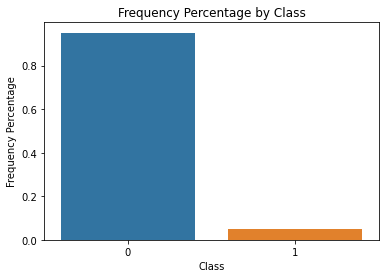

In [18]:
ax = sns.barplot(x=nk.index, y=nk/len(DF))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

<AxesSubplot:>

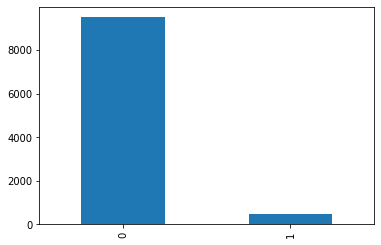

In [19]:
DF['Class'].value_counts().plot(kind='bar')

In [20]:
TRX, TSX, TRy, TSy = train_test_split(DFX, 
                                    DFy, test_size=0.33, 
                                    random_state=1701, stratify=DFy)
print(len(TRX), len(TSX))

6700 3300


In [21]:
TRy.value_counts(normalize=True)

0    0.950746
1    0.049254
Name: Class, dtype: float64

In [22]:
SKF5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=1701)

In [23]:
for itr, its in SKF5.split(TRX, TRy):
    print(itr, its)

[   0    2    4 ... 6696 6698 6699] [   1    3   10 ... 6684 6685 6697]
[   1    2    3 ... 6697 6698 6699] [   0    5    7 ... 6687 6694 6695]
[   0    1    3 ... 6697 6698 6699] [   2    8   13 ... 6674 6686 6690]
[   0    1    2 ... 6697 6698 6699] [   4   12   19 ... 6688 6689 6691]
[   0    1    2 ... 6694 6695 6697] [   6   33   34 ... 6696 6698 6699]


In [24]:
TROUT = pd.concat([TRy], axis=1)
CVOUT = pd.concat([TRy], axis=1)
TSOUT = pd.concat([TSy], axis=1)

In [25]:
from sklearn.metrics import roc_auc_score, log_loss, average_precision_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, cohen_kappa_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [26]:
def foo(y, ph, yh, pos_label):
    logloss = log_loss(y, ph)
    auc = roc_auc_score(y, ph)
    aucpr = average_precision_score(y, ph, pos_label=pos_label)
    tn, fp, fn, tp = confusion_matrix(y, yh).ravel()
    acc = accuracy_score(y, yh)
    f1 = f1_score(y, yh, pos_label=pos_label)
    kap = cohen_kappa_score(y, yh)
    sens = recall_score(y, yh, pos_label=pos_label)
    spec = tn/(fp+tn)
    prec = precision_score(y, yh, pos_label=pos_label)
    return dict(logloss=logloss, auc=auc, aucpr=aucpr,
                 tn=tn, fp=fp, fn=fn, tp=tp, acc=acc,
               f1=f1, kap=kap, sens=sens, spec=spec, prec=prec)

In [27]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

In [28]:
def PR(y, ph):
    prec, rec, cutoff = precision_recall_curve(y, ph)
    avgprec = average_precision_score(y, ph)
    
    plt.step(rec, prec, color='k', alpha=0.7, where='post')
    plt.fill_between(rec, prec, step='post', alpha=0.3, color='k')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = {0:0.10f}'.format(avgprec))

In [29]:
def ROC(y, ph):
    fpr, tpr, cutoff = roc_curve(y, ph)
    aucroc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate(1-Spec)')
    plt.ylabel('True Positive Rate(Sens)')
    plt.title('ROC curve: AUC = {0:0.10f}'.format(aucroc))
    plt.legend(loc="lower right")

In [30]:
## LogisticRegression ##

Eglm = LogisticRegression(penalty='l2',
                         C=1.0,
                         class_weight='balanced',
                         random_state=1701,
                         solver='liblinear',
                         max_iter=1000,
                         n_jobs=1)
%time Eglm.fit(TRX, TRy)
Eglm.score(TRX, TRy)

Wall time: 56.9 ms


0.977313432835821

In [31]:
from sklearn.model_selection import cross_val_score
CVscores = cross_val_score(Eglm, TRX, TRy, cv=SKF5)
CVscores

array([0.96716418, 0.97985075, 0.97313433, 0.97238806, 0.97164179])

In [32]:
from sklearn.model_selection import cross_validate
CValid = cross_validate(Eglm, TRX, TRy, cv=SKF5, scoring='average_precision', return_train_score=True)
pd.DataFrame(CValid)

,fit_time,score_time,test_score,train_score
0,0.075798,0.002993,0.925978,0.927523
1,0.048869,0.001995,0.944479,0.917266
2,0.046911,0.001998,0.929800,0.922241
3,0.056957,0.003025,0.887069,0.931364
4,0.067952,0.001994,0.879848,0.935810


In [33]:
from sklearn.model_selection import cross_val_predict
CVOUT = pd.DataFrame(TRy)
CVOUT['phglm'] = cross_val_predict(Eglm, TRX, TRy, cv=SKF5, method='predict_proba')[:, 1]
CVOUT['yhglm'] = cross_val_predict(Eglm, TRX, TRy, cv=SKF5)
CVOUT.head()

,Class,phglm,yhglm
135,0,0.028957,0
5398,0,0.016475,0
8946,0,0.106350,0
5186,0,0.353161,0
8735,0,0.042866,0


In [34]:
log_loss(TRy, CVOUT['phglm'])

0.13198482573799863

In [35]:
TROUT = pd.DataFrame(TRy)
TROUT['phglm'] = Eglm.predict_proba(TRX)[:,1]
TROUT['yhglm'] = Eglm.predict(TRX)

TSOUT = pd.DataFrame(TSy)
TSOUT['phglm'] = Eglm.predict_proba(TSX)[:,1]
TSOUT['yhglm'] = Eglm.predict(TSX)

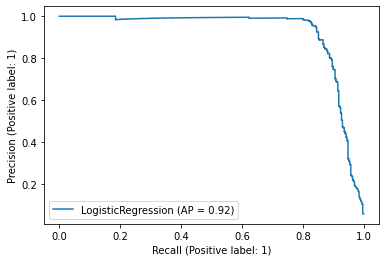

In [36]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(Eglm, TRX, TRy)

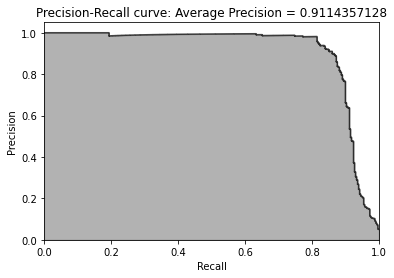

In [37]:
PR(TRy, CVOUT['phglm'])

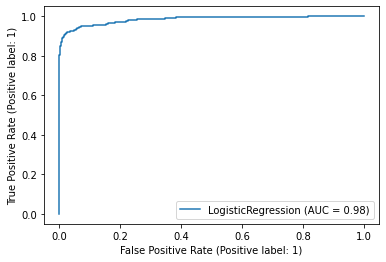

In [38]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Eglm, TRX, TRy)

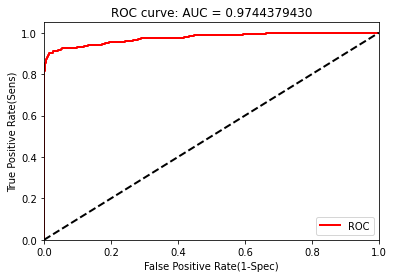

In [39]:
ROC(TRy, CVOUT['phglm'])

In [40]:
r1 = pd.DataFrame(foo(TRy, TROUT['phglm'], TROUT['yhglm'], pos_label=1), index=['glm'])
r2 = pd.DataFrame(foo(TRy, CVOUT['phglm'], CVOUT['yhglm'], pos_label=1), index=['glm'])
r3 = pd.DataFrame(foo(TSy, TSOUT['phglm'], TSOUT['yhglm'], pos_label=1), index=['glm'])
METglm = pd.concat([r1, r2, r3], axis = 0)
METglm['model'] = 'glm'
METglm['TRTS'] = ['TR', 'CV', 'TS']
METglm

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec,model,TRTS
glm,0.135278,0.983933,0.922860,6249,121,31,299,0.977313,0.797333,0.785501,0.906061,0.981005,0.711905,glm,TR
glm,0.131985,0.974438,0.911436,6221,149,33,297,0.972836,0.765464,0.751388,0.900000,0.976609,0.665919,glm,CV
glm,0.148580,0.980824,0.932723,3046,92,14,148,0.967879,0.736318,0.719900,0.913580,0.970682,0.616667,glm,TS


In [41]:
## glm GridSearchCV

from sklearn.model_selection import GridSearchCV
glmGrid = {'C': [0.1, 1, 10]}

Eglm2 = LogisticRegression(max_iter = 1000,
                          tol=1e-2,
                          penalty = 'l2',
                          class_weight='balanced',
                          solver='liblinear',
                          random_state=1701)
GSglm = GridSearchCV(Eglm2, glmGrid, cv=SKF5)
%time GSglm.fit(TRX, TRy)

Wall time: 566 ms


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1701, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=1701,
                                          solver='liblinear', tol=0.01),
             param_grid={'C': [0.1, 1, 10]})

In [42]:
pd.DataFrame(foo(TRy, 
                 GSglm.predict_proba(TRX)[:, 1], 
                 GSglm.predict(TRX), 
                 pos_label=1), 
             index=['glmGS'])

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec
glmGS,0.382478,0.925963,0.834674,6358,12,72,258,0.987463,0.86,0.853506,0.781818,0.998116,0.955556


In [43]:
print('Accuracy score=', GSglm.best_score_, 'at best_parms_=', GSglm.best_params_)

Accuracy score= 0.9870149253731343 at best_parms_= {'C': 0.1}


In [44]:
## LogisticRegressionCV

from sklearn.linear_model import LogisticRegressionCV

CVglm = LogisticRegressionCV(cv=SKF5,
                            max_iter=1000,
                            tol=1e-2,
                            scoring='average_precision',
                            penalty='l2',
                            class_weight='balanced',
                            Cs=[0.1, 1, 10],
                            solver='liblinear',
                            random_state=1701)
%time CVglm.fit(TRX, TRy)

Wall time: 475 ms


LogisticRegressionCV(Cs=[0.1, 1, 10], class_weight='balanced',
                     cv=StratifiedKFold(n_splits=5, random_state=1701, shuffle=True),
                     max_iter=1000, random_state=1701,
                     scoring='average_precision', solver='liblinear', tol=0.01)

In [45]:
pd.DataFrame(foo(TRy, 
                 CVglm.predict_proba(TRX)[:, 1],
                 CVglm.predict(TRX),
                 pos_label=1),
            index=['glmCV'])

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec
glmCV,0.382478,0.925963,0.834674,6358,12,72,258,0.987463,0.86,0.853506,0.781818,0.998116,0.955556


In [46]:
## Random Forest ##

Erf = RandomForestClassifier(n_estimators=10,
                            class_weight='balanced',
                            n_jobs=-1,
                            random_state=1701)
%time Erf.fit(TRX, TRy)
Erf.score(TRX, TRy)

Wall time: 96.3 ms


0.9985074626865672

In [47]:
CVscores = cross_val_score(Erf, TRX, TRy, cv=SKF5)
CVscores

array([0.99029851, 0.99029851, 0.99179104, 0.98880597, 0.98955224])

In [48]:
CValid = cross_validate(Erf, 
                        TRX,
                        TRy,
                        cv=SKF5,
                        scoring='average_precision',
                        return_train_score=True)
pd.DataFrame(CValid)

,fit_time,score_time,test_score,train_score
0,0.079784,0.007979,0.910553,0.999843
1,0.072806,0.007980,0.947579,1.000000
2,0.095746,0.009972,0.889677,0.999915
3,0.061835,0.007979,0.865760,0.999448
4,0.067820,0.009972,0.849036,1.000000


In [49]:
CVOUT['phrf'] = cross_val_predict(Erf, TRX, TRy, cv=SKF5, method='predict_proba')[:, 1]
CVOUT['yhrf'] = cross_val_predict(Erf, TRX, TRy, cv=SKF5)
CVOUT.head()

,Class,phglm,yhglm,phrf,yhrf
135,0,0.028957,0,0.0,0
5398,0,0.016475,0,0.0,0
8946,0,0.106350,0,0.0,0
5186,0,0.353161,0,0.0,0
8735,0,0.042866,0,0.0,0


In [50]:
TROUT['phrf'] = Erf.predict_proba(TRX)[:,1]
TROUT['yhrf'] = Erf.predict(TRX)

TSOUT['phrf'] = Erf.predict_proba(TSX)[:,1]
TSOUT['yhrf'] = Erf.predict(TSX)

In [51]:
log_loss(TRy, CVOUT['phrf'])

0.1642421421879126

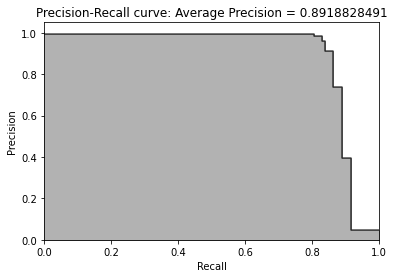

In [52]:
PR(TRy, CVOUT['phrf'])

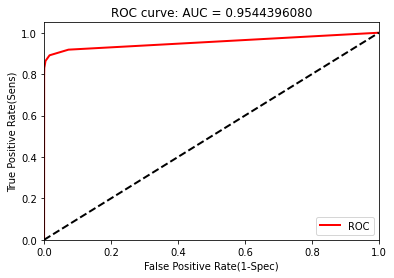

In [53]:
ROC(TRy, CVOUT['phrf'])

In [54]:
r1 = pd.DataFrame(foo(TRy, TROUT['phrf'], TROUT['yhrf'], pos_label=1), index=['rf'])
r2 = pd.DataFrame(foo(TRy, CVOUT['phrf'], CVOUT['yhrf'], pos_label=1), index=['rf'])
r3 = pd.DataFrame(foo(TSy, TSOUT['phrf'], TSOUT['yhrf'], pos_label=1), index=['rf'])
METrf = pd.concat([r1, r2, r3], axis = 0)
METrf['model'] = 'rf'
METrf['TRTS'] = ['TR', 'CV', 'TS']
METrf

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec,model,TRTS
rf,0.007894,0.999991,0.999752,6370,0,10,320,0.998507,0.984615,0.983831,0.969697,1.000000,1.000000,rf,TR
rf,0.164242,0.954440,0.891883,6368,2,64,266,0.990149,0.889632,0.884535,0.806061,0.999686,0.992537,rf,CV
rf,0.152726,0.955753,0.905618,3137,1,24,138,0.992424,0.916944,0.912999,0.851852,0.999681,0.992806,rf,TS


In [55]:
# RandomForest GridSearchCV

rfGrid = {'n_estimators': [10, 100, 200]}

Erf = RandomForestClassifier(class_weight='balanced',
                             n_jobs=-1,
                            random_state=1701) 
GSrf = GridSearchCV(Erf, rfGrid, cv=SKF5)
%time GSrf.fit(TRX, TRy)
GSrf.score(TRX, TRy)

Wall time: 8.72 s


0.9998507462686567

In [56]:
pd.DataFrame(foo(TRy, 
                 GSrf.predict_proba(TRX)[:,1],
                 GSrf.predict(TRX),
                 pos_label=1),
             index=['rfGS'])

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec
rfGS,0.007565,1.0,1.0,6370,0,1,329,0.999851,0.998483,0.998404,0.99697,1.0,1.0


In [57]:
print(GSrf.best_estimator_)
print(GSrf.best_params_)
print(GSrf.best_score_)
pd.DataFrame(GSrf.cv_results_).T

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=1701)
{'n_estimators': 100}
0.9911940298507462


,0,1,2
mean_fit_time,0.086175,0.501013,0.947104
std_fit_time,0.032403,0.022966,0.026756
mean_score_time,0.008363,0.024996,0.047818
std_score_time,0.000396,0.001549,0.001489
param_n_estimators,10,100,200
params,{'n_estimators': 10},{'n_estimators': 100},{'n_estimators': 200}
split0_test_score,0.990299,0.991045,0.991045
split1_test_score,0.990299,0.992537,0.992537
split2_test_score,0.991791,0.992537,0.991791
split3_test_score,0.988806,0.989552,0.988806


In [58]:
## XGBoost ##

params_xGB = {'n_jobs': 16,
              'eval_metric': 'logloss',
              'seed':2018,
              'verbosity':1}

In [59]:
Exgb = xgb.XGBClassifier(**params_xGB,
                         use_label_encoder=False)

%time Exgb.fit(TRX, TRy, verbose=True)
Exgb.score(TRX, TRy)

Wall time: 1.02 s


1.0

In [60]:
CVscores = cross_val_score(Exgb, TRX, TRy, cv=SKF5)
CVscores

array([0.99253731, 0.99179104, 0.99104478, 0.99179104, 0.99029851])

In [61]:
CValid = cross_validate(Exgb, 
                        TRX,
                        TRy,
                        cv=SKF5,
                        scoring='average_precision',
                        return_train_score=True)
pd.DataFrame(CValid)

,fit_time,score_time,test_score,train_score
0,0.803459,0.008997,0.923388,1.0
1,0.780873,0.008006,0.936341,1.0
2,0.757032,0.007979,0.918096,1.0
3,0.804883,0.008485,0.918311,1.0
4,0.870707,0.008976,0.881663,1.0


In [62]:
CVOUT['phxgb'] = cross_val_predict(Exgb, TRX, TRy, cv=SKF5, method='predict_proba')[:, 1]
CVOUT['yhxgb'] = cross_val_predict(Exgb, TRX, TRy, cv=SKF5)
CVOUT.head()

,Class,phglm,yhglm,phrf,yhrf,phxgb,yhxgb
135,0,0.028957,0,0.0,0,0.000009,0
5398,0,0.016475,0,0.0,0,0.000010,0
8946,0,0.106350,0,0.0,0,0.000341,0
5186,0,0.353161,0,0.0,0,0.000634,0
8735,0,0.042866,0,0.0,0,0.000058,0


In [63]:
TROUT['phxgb'] = Exgb.predict_proba(TRX)[:,1]
TROUT['yhxgb'] = Exgb.predict(TRX)

TSOUT['phxgb'] = Exgb.predict_proba(TSX)[:,1]
TSOUT['yhxgb'] = Exgb.predict(TSX)

In [64]:
log_loss(TRy, CVOUT['phxgb'])

0.05012512458645993

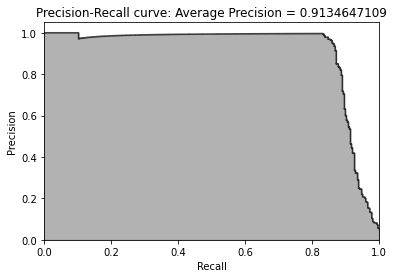

In [65]:
PR(TRy, CVOUT['phxgb'])

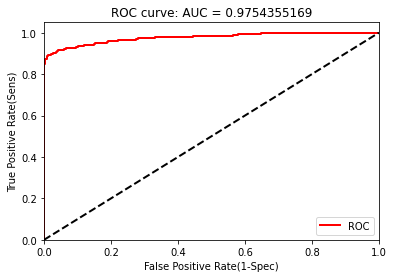

In [66]:
ROC(TRy, CVOUT['phxgb'])

In [67]:
r1 = pd.DataFrame(foo(TRy, TROUT['phxgb'], TROUT['yhxgb'], pos_label=1), index=['xgb'])
r2 = pd.DataFrame(foo(TRy, CVOUT['phxgb'], CVOUT['yhxgb'], pos_label=1), index=['xgb'])
r3 = pd.DataFrame(foo(TSy, TSOUT['phxgb'], TSOUT['yhxgb'], pos_label=1), index=['xgb'])
METxgb = pd.concat([r1, r2, r3], axis = 0)
METxgb['model'] = 'xgb'
METxgb['TRTS'] = ['TR', 'CV', 'TS']
METxgb

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec,model,TRTS
xgb,0.000871,1.000000,1.000000,6370,0,0,330,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,xgb,TR
xgb,0.050125,0.975436,0.913465,6366,4,53,277,0.991493,0.906710,0.902283,0.839394,0.999372,0.985765,xgb,CV
xgb,0.037745,0.982119,0.940249,3137,1,20,142,0.993636,0.931148,0.927825,0.876543,0.999681,0.993007,xgb,TS


In [68]:
TRy.value_counts()

0    6370
1     330
Name: Class, dtype: int64

In [69]:
6370/330

19.303030303030305

In [70]:
## XGBoost RandomizedSearchCV ##

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params = {'lambda':[0, 0.5, 1],
          'alpha':[0, 0.5, 1],
          'gamma': [0.5, 1, 1.5, 2, 5],
          'max_delta_step':[1, 3, 5],
          'colsample_bytree':[0.5, 1.0]}

In [71]:
params = {'reg_lambda':[0, 0.5, 1],
          'reg_alpha':[0, 0.5, 1],
          'gamma': [0.5, 1, 1.5, 2, 5],
          'max_delta_step':[1, 3, 5],
          'colsample_bytree':[0.5, 1.0],
          'subsample': [0.5, 0.75, 1.0],
          'max_depth': [4, 5, 6],
          'scale_pos_weight': [1, 10, 19.3],
          'min_child_weight': [1, 5, 10]}

In [72]:
Exgb = xgb.XGBClassifier(objective = 'binary:logistic',
                         eval_metric = 'logloss',
                         n_estimators = 100,
                         learning_rate = 0.02,
                         use_label_encoder=False)

In [73]:
RSxgb = RandomizedSearchCV(Exgb,
                          param_distributions=params,
                          n_iter=5,
                          scoring='average_precision',
                          n_jobs=4,
                          cv=SKF5,
                          verbose=3,
                          random_state=1701) # 학번
%time RSxgb.fit(TRX, TRy)
RSxgb.score(TRX, TRy)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 20.1 s


0.9939835077730164

In [74]:
pd.DataFrame(foo(TRy,
                 RSxgb.predict_proba(TRX)[:,1],
                 RSxgb.predict(TRX),
                 pos_label=1),
             index = ['xgbRS'])

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec
xgbRS,0.101994,0.999835,0.993984,6360,10,3,327,0.99806,0.98051,0.979489,0.990909,0.99843,0.970326


In [75]:
print(RSxgb.best_estimator_)
print(RSxgb.best_params_)
print(RSxgb.best_score_)
pd.DataFrame(RSxgb.cv_results_).T

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=1.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.02, max_delta_step=3,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=19.3, subsample=0.75, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
{'subsample': 0.75, 'scale_pos_weight': 19.3, 'reg_lambda': 1, 'reg_alpha': 0, 'min_child_weight': 1, 'max_depth': 6, 'max_delta_step': 3, 'gamma': 1.5, 'colsample_bytree': 0.5}
0.9211597615462696


,0,1,2,3,4
mean_fit_time,2.112052,2.565373,2.751183,1.637507,2.585807
std_fit_time,0.29578,0.027417,0.158423,0.092535,0.478497
mean_score_time,0.015758,0.01496,0.011969,0.010776,0.010873
std_score_time,0.007148,0.00289,0.000631,0.001209,0.001555
param_subsample,0.5,1.0,0.75,0.75,0.5
param_scale_pos_weight,1,1,19.3,1,1
param_reg_lambda,0,1,1,0,0
param_reg_alpha,0,0.5,0,0.5,1
param_min_child_weight,1,1,1,10,10
param_max_depth,6,6,6,4,6


In [76]:
## XGBoost GridSearchCV

params = {'reg_lambda':[0, 0.5, 1],
          'reg_alpha':[0, 0.5, 1],
          'gamma': [0.5, 1, 1.5, 2, 5],
          'max_delta_step':[1, 3, 5],
          'colsample_bytree':[0.6, 0.8, 1.0],
          'subsample': [0.6, 0.8, 1.0],
          'max_depth': [3, 4, 5],
          'scale_pos_weight': [1, 10, 19.3],
          'min_child_weight': [1, 5, 10]}

In [77]:
params = {'reg_lambda':[0, 1],
          'reg_alpha':[0, 1],
          'gamma': [0.5, 1, 1.5],
          'max_delta_step':[1, 3, 5],
          #'colsample_bytree':[0.5, 1.0],
          #'subsample': [0.5, 0.75, 1.0],
          #'max_depth': [4, 5, 6],
          'scale_pos_weight': [1, 10, 19.3]
          #'min_child_weight': [1, 5, 10]
         }

In [78]:
Exgb = xgb.XGBClassifier(objective = 'binary:logistic',
                         eval_metric = 'logloss',
                         n_estimators = 100,
                         learning_rate = 0.02,
                         n_jobs=4,
                         use_label_encoder=False)

In [79]:
GSxgb = GridSearchCV(Exgb,
                     param_grid=params,
                     scoring='average_precision',
                     n_jobs=4,
                     cv=SKF5,
                     verbose=3)
%time GSxgb.fit(TRX, TRy)
GSxgb.score(TRX, TRy)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Wall time: 13min 11s


0.9951723246928292

In [80]:
pd.DataFrame(foo(TRy,
                 GSxgb.predict_proba(TRX)[:, 1],
                 GSxgb.predict(TRX),
                 pos_label=1),
             index = ['xgbRS'])

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec
xgbRS,0.0943,0.999847,0.995172,6352,18,1,329,0.997164,0.971935,0.970443,0.99697,0.997174,0.948127


In [81]:
print(GSxgb.best_estimator_)
print(GSxgb.best_params_)
print(GSxgb.best_score_)
pd.DataFrame(GSxgb.cv_results_).T

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.02, max_delta_step=3,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=1, reg_lambda=1,
              scale_pos_weight=19.3, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
{'gamma': 1.5, 'max_delta_step': 3, 'reg_alpha': 1, 'reg_lambda': 1, 'scale_pos_weight': 19.3}
0.9164253673026475


,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
mean_fit_time,6.454331,6.568246,6.60895,5.000178,6.045247,6.308843,5.579247,6.740617,6.636881,4.748839,...,6.761896,5.003459,5.667394,5.597108,4.994705,5.359254,5.756082,5.08126,5.480016,5.096335
std_fit_time,0.569452,0.184495,0.230375,0.18245,0.181112,0.13294,0.104725,0.312222,0.116958,0.158623,...,0.699647,0.142243,0.090247,0.085583,0.114356,0.163538,0.103884,0.160355,0.175112,0.464229
mean_score_time,0.012366,0.014362,0.014562,0.01267,0.013468,0.014465,0.017559,0.013165,0.014761,0.011569,...,0.010966,0.013394,0.017656,0.011769,0.011969,0.012868,0.0374,0.012569,0.014065,0.012469
std_score_time,0.000798,0.002054,0.002721,0.000865,0.001782,0.003313,0.005776,0.000977,0.002778,0.000798,...,0.000896,0.001741,0.006428,0.000977,0.000892,0.002645,0.050878,0.001619,0.002682,0.001608
param_gamma,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5
param_max_delta_step,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
param_reg_alpha,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,1,1,1,1,1,1
param_reg_lambda,0,0,0,1,1,1,0,0,0,1,...,0,1,1,1,0,0,0,1,1,1
param_scale_pos_weight,1,10,19.3,1,10,19.3,1,10,19.3,1,...,19.3,1,10,19.3,1,10,19.3,1,10,19.3
params,"{'gamma': 0.5, 'max_delta_step': 1, 'reg_alpha...","{'gamma': 0.5, 'max_delta_step': 1, 'reg_alpha...","{'gamma': 0.5, 'max_delta_step': 1, 'reg_alpha...","{'gamma': 0.5, 'max_delta_step': 1, 'reg_alpha...","{'gamma': 0.5, 'max_delta_step': 1, 'reg_alpha...","{'gamma': 0.5, 'max_delta_step': 1, 'reg_alpha...","{'gamma': 0.5, 'max_delta_step': 1, 'reg_alpha...","{'gamma': 0.5, 'max_delta_step': 1, 'reg_alpha...","{'gamma': 0.5, 'max_delta_step': 1, 'reg_alpha...","{'gamma': 0.5, 'max_delta_step': 1, 'reg_alpha...",...,"{'gamma': 1.5, 'max_delta_step': 5, 'reg_alpha...","{'gamma': 1.5, 'max_delta_step': 5, 'reg_alpha...","{'gamma': 1.5, 'max_delta_step': 5, 'reg_alpha...","{'gamma': 1.5, 'max_delta_step': 5, 'reg_alpha...","{'gamma': 1.5, 'max_delta_step': 5, 'reg_alpha...","{'gamma': 1.5, 'max_delta_step': 5, 'reg_alpha...","{'gamma': 1.5, 'max_delta_step': 5, 'reg_alpha...","{'gamma': 1.5, 'max_delta_step': 5, 'reg_alpha...","{'gamma': 1.5, 'max_delta_step': 5, 'reg_alpha...","{'gamma': 1.5, 'max_delta_step': 5, 'reg_alpha..."


In [82]:
## Lightgbm ##

import lightgbm as lgb

params_xGB={'n_jobs': 16,
            'learning_rate': 0.3,
            'gamma': 0,
            'max_depth': 6,
            'min_child_weight': 1,
            'max_delta_step': 0,
            'subsample': 1.0,
            'colsample_bytree': 1.0,
            'objective': 'binary:logistic',
            'num_class': 1,
            'eval_metric': 'logloss',
            'seed': 2018,
            'verbosity': 1}

In [83]:
params_lightGB = {'objective': 'binary',
                  'metric':'binary_logloss',
                  'n_jobs':16,
                  'learning_rate': 0.01,
                  'max_depth': 4,
                  'bagging_seed': 2018,
                  'verbose': -1,
                  'force_col_wise': True}

In [84]:
Elgb = lgb.LGBMClassifier(**params_lightGB,
                         n_estimators=2000)
%time Elgb.fit(TRX, TRy)
Elgb.score(TRX, TRy)

Wall time: 2.55 s


1.0

In [85]:
CVscores = cross_val_score(Elgb, TRX, TRy, cv=SKF5)
CVscores

array([0.99253731, 0.99253731, 0.99179104, 0.99104478, 0.99104478])

In [86]:
CValid = cross_validate(Elgb, 
                        TRX,
                        TRy,
                        cv=SKF5,
                        scoring='average_precision',
                        return_train_score=True)
pd.DataFrame(CValid)

,fit_time,score_time,test_score,train_score
0,2.306964,0.063829,0.932227,1.0
1,2.477511,0.061835,0.935679,1.0
2,2.258079,0.062803,0.916331,1.0
3,2.427127,0.067819,0.905297,1.0
4,2.188251,0.065825,0.902324,1.0


In [87]:
CVOUT['phlgb'] = cross_val_predict(Elgb, TRX, TRy, cv=SKF5, method='predict_proba')[:, 1]
CVOUT['yhlgb'] = cross_val_predict(Elgb, TRX, TRy, cv=SKF5)
CVOUT.head()

,Class,phglm,yhglm,phrf,yhrf,phxgb,yhxgb,phlgb,yhlgb
135,0,0.028957,0,0.0,0,0.000009,0,0.000001,0
5398,0,0.016475,0,0.0,0,0.000010,0,0.000002,0
8946,0,0.106350,0,0.0,0,0.000341,0,0.000117,0
5186,0,0.353161,0,0.0,0,0.000634,0,0.001376,0
8735,0,0.042866,0,0.0,0,0.000058,0,0.000026,0


In [88]:
TROUT['phlgb'] = Elgb.predict_proba(TRX)[:,1]
TROUT['yhlgb'] = Elgb.predict(TRX)

TSOUT['phlgb'] = Elgb.predict_proba(TSX)[:,1]
TSOUT['yhlgb'] = Elgb.predict(TSX)

In [89]:
log_loss(TRy, CVOUT['phlgb'])

0.05694878746726093

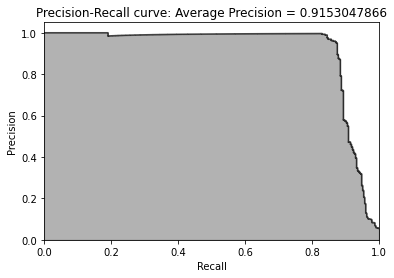

In [90]:
PR(TRy, CVOUT['phlgb'])

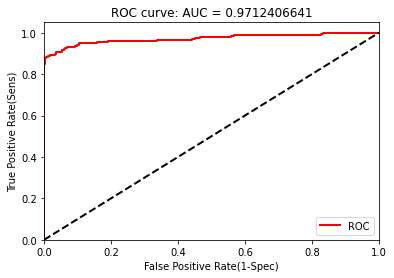

In [91]:
ROC(TRy, CVOUT['phlgb'])

In [92]:
r1 = pd.DataFrame(foo(TRy, TROUT['phlgb'], TROUT['yhlgb'], pos_label=1), index=['lgb'])
r2 = pd.DataFrame(foo(TRy, CVOUT['phlgb'], CVOUT['yhlgb'], pos_label=1), index=['lgb'])
r3 = pd.DataFrame(foo(TSy, TSOUT['phlgb'], TSOUT['yhlgb'], pos_label=1), index=['lgb'])
METlgb = pd.concat([r1, r2, r3], axis = 0)
METlgb['model'] = 'lgb'
METlgb['TRTS'] = ['TR', 'CV', 'TS']
METlgb

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec,model,TRTS
lgb,0.000535,1.000000,1.000000,6370,0,0,330,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,lgb,TR
lgb,0.056949,0.971241,0.915305,6368,2,53,277,0.991791,0.909688,0.905420,0.839394,0.999686,0.992832,lgb,CV
lgb,0.040550,0.979550,0.940326,3137,1,20,142,0.993636,0.931148,0.927825,0.876543,0.999681,0.993007,lgb,TS


In [93]:
params = {'reg_lambda':[0, 0.5, 1],
          'reg_alpha':[0, 0.5, 1],
          'min_gain_to_split': [0.5, 1, 1.5, 2, 5],
          'max_delta_step': [1, 3, 5],
          'colsample_bytree':[0.5, 1.0],
          'subsample': [0.5, 0.75, 1.0],
          'max_depth': [4, 5, 6],
          'scale_pos_weight': [1, 10, 19.3],
          'min_child_weight': [1, 5, 10]}

In [94]:
Elgb = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss',
                         n_estimators = 100,
                         learning_rate = 0.02,
                         n_jobs=4)

In [95]:
RSlgb = RandomizedSearchCV(Elgb,
                          param_distributions=params,
                          n_iter=5,
                          scoring='average_precision',
                          n_jobs=4,
                          cv=SKF5,
                          verbose=3,
                          random_state=1701) # 학번
%time RSlgb.fit(TRX, TRy)
RSlgb.score(TRX, TRy)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Warning] min_gain_to_split is set=5, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5
Wall time: 2.27 s


0.9913191436571558

In [96]:
pd.DataFrame(foo(TRy,
                 RSlgb.predict_proba(TRX)[:, 1],
                 RSlgb.predict(TRX),
                 pos_label=1),
             index = ['lgbRS'])

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec
lgbRS,0.063184,0.999529,0.991319,6353,17,3,327,0.997015,0.970326,0.968756,0.990909,0.997331,0.950581


In [97]:
print(RSlgb.best_estimator_)
print(RSlgb.best_params_)
print(RSlgb.best_score_)
pd.DataFrame(RSlgb.cv_results_).T

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.02, max_delta_step=3,
               max_depth=5, metric='binary_logloss', min_child_weight=5,
               min_gain_to_split=5, n_jobs=4, objective='binary', reg_alpha=0,
               reg_lambda=1, scale_pos_weight=19.3, subsample=0.75)
{'subsample': 0.75, 'scale_pos_weight': 19.3, 'reg_lambda': 1, 'reg_alpha': 0, 'min_gain_to_split': 5, 'min_child_weight': 5, 'max_depth': 5, 'max_delta_step': 3, 'colsample_bytree': 0.5}
0.9198784825275667


,0,1,2,3,4
mean_fit_time,0.277863,0.189293,0.316187,0.18049,0.241545
std_fit_time,0.071493,0.005997,0.034167,0.016078,0.025662
mean_score_time,0.009574,0.008577,0.013371,0.008591,0.009508
std_score_time,0.000489,0.001017,0.004905,0.000812,0.001792
param_subsample,0.5,1.0,0.75,0.75,0.5
param_scale_pos_weight,1,1,19.3,1,1
param_reg_lambda,0,1,1,0,0
param_reg_alpha,0,0.5,0,0.5,1
param_min_gain_to_split,2,5,5,5,5
param_min_child_weight,1,5,5,10,10


In [98]:
## Lightgbm  GridSearchCV

params = {'reg_lambda':[0, 0.5, 1],
          'reg_alpha':[0, 0.5, 1],
          'min_gain_to_split': [0.5, 1, 1.5, 2, 5],
          'max_delta_step':[1, 3, 5],
          'colsample_bytree':[0.6, 0.8, 1.0],
          'subsample': [0.6, 0.8, 1.0],
          'max_depth': [3, 4, 5],
          'scale_pos_weight': [1, 10, 19.3],
          'min_child_weight': [1, 5, 10]}

In [99]:
params = {'reg_lambda':[0, 1],
          'reg_alpha':[0, 1],
          'min_gain_to_split': [0.5, 1, 1.5],
          'max_delta_step':[1, 3, 5],
          #'colsample_bytree':[0.6, 0.8, 1.0],
          #'subsample': [0.6, 0.8, 1.0],
          #'max_depth': [3, 4, 5],
          'scale_pos_weight': [1, 10, 19.3]
          #'min_child_weight': [1, 5, 10]
         }

In [100]:
Elgb = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss',
                         n_estimators = 100,
                         learning_rate = 0.02,
                         n_jobs=4)

In [101]:
GSlgb = GridSearchCV(Elgb,
                     param_grid=params,
                     scoring='average_precision',
                     n_jobs=4,
                     cv=SKF5,
                     verbose=3)
%time GSlgb.fit(TRX, TRy)
GSlgb.score(TRX, TRy)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] min_gain_to_split is set=1.5, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.5
Wall time: 1min 28s


0.9957917470719677

In [102]:
pd.DataFrame(foo(TRy,
                 GSlgb.predict_proba(TRX)[:, 1],
                 GSlgb.predict(TRX),
                 pos_label=1),
             index=['lgbGS'])

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec
lgbGS,0.032568,0.999888,0.995792,6351,19,0,330,0.997164,0.972018,0.970525,1.0,0.997017,0.945559


In [103]:
print(GSlgb.best_estimator_)
print(GSlgb.best_params_)
print(GSlgb.best_score_)
pd.DataFrame(GSlgb.cv_results_).T

LGBMClassifier(learning_rate=0.02, max_delta_step=5, metric='binary_logloss',
               min_gain_to_split=1.5, n_jobs=4, objective='binary', reg_alpha=1,
               reg_lambda=1, scale_pos_weight=19.3)
{'max_delta_step': 5, 'min_gain_to_split': 1.5, 'reg_alpha': 1, 'reg_lambda': 1, 'scale_pos_weight': 19.3}
0.9213502862394165


,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
mean_fit_time,0.540374,0.400366,0.327499,0.487753,0.41748,0.327763,0.511215,0.412142,0.378243,0.525867,...,0.746259,0.408611,0.680659,0.673805,0.420197,0.884208,0.876594,0.409201,0.862989,0.729303
std_fit_time,0.043566,0.06107,0.032714,0.023141,0.066062,0.045847,0.035468,0.008321,0.06938,0.02308,...,0.014809,0.019272,0.025505,0.01893,0.03535,0.022424,0.023792,0.015086,0.086547,0.09771
mean_score_time,0.012566,0.008787,0.009295,0.010204,0.009696,0.010582,0.009399,0.009197,0.00941,0.010602,...,0.009795,0.009195,0.014002,0.010691,0.009002,0.010503,0.010204,0.008611,0.0098,0.009295
std_score_time,0.003314,0.000749,0.000608,0.000403,0.000987,0.001361,0.000484,0.000405,0.001046,0.001736,...,0.000753,0.000995,0.005456,0.00166,0.000622,0.001822,0.000748,0.000799,0.000745,0.000389
param_max_delta_step,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
param_min_gain_to_split,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5
param_reg_alpha,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,1,1,1,1,1,1
param_reg_lambda,0,0,0,1,1,1,0,0,0,1,...,0,1,1,1,0,0,0,1,1,1
param_scale_pos_weight,1,10,19.3,1,10,19.3,1,10,19.3,1,...,19.3,1,10,19.3,1,10,19.3,1,10,19.3
params,"{'max_delta_step': 1, 'min_gain_to_split': 0.5...","{'max_delta_step': 1, 'min_gain_to_split': 0.5...","{'max_delta_step': 1, 'min_gain_to_split': 0.5...","{'max_delta_step': 1, 'min_gain_to_split': 0.5...","{'max_delta_step': 1, 'min_gain_to_split': 0.5...","{'max_delta_step': 1, 'min_gain_to_split': 0.5...","{'max_delta_step': 1, 'min_gain_to_split': 0.5...","{'max_delta_step': 1, 'min_gain_to_split': 0.5...","{'max_delta_step': 1, 'min_gain_to_split': 0.5...","{'max_delta_step': 1, 'min_gain_to_split': 0.5...",...,"{'max_delta_step': 5, 'min_gain_to_split': 1.5...","{'max_delta_step': 5, 'min_gain_to_split': 1.5...","{'max_delta_step': 5, 'min_gain_to_split': 1.5...","{'max_delta_step': 5, 'min_gain_to_split': 1.5...","{'max_delta_step': 5, 'min_gain_to_split': 1.5...","{'max_delta_step': 5, 'min_gain_to_split': 1.5...","{'max_delta_step': 5, 'min_gain_to_split': 1.5...","{'max_delta_step': 5, 'min_gain_to_split': 1.5...","{'max_delta_step': 5, 'min_gain_to_split': 1.5...","{'max_delta_step': 5, 'min_gain_to_split': 1.5..."


In [104]:
print('Log Loss of lgb on TS: ', log_loss(TSy, TSOUT['phlgb'])) ###############

Log Loss of lgb on TS:  0.04054952918006341


In [105]:
## TS 평가 ##

print('Log Loss of glm on TS: ', log_loss(TSy, TSOUT['phglm']))
print('Log Loss of rf on TS: ', log_loss(TSy, TSOUT['phrf']))
print('Log Loss of xgb on TS: ', log_loss(TSy, TSOUT['phxgb']))
print('Log Loss of lgb on TS: ', log_loss(TSy, TSOUT['phlgb']))

Log Loss of glm on TS:  0.1485800570777961
Log Loss of rf on TS:  0.1527255266888251
Log Loss of xgb on TS:  0.03774494786149882
Log Loss of lgb on TS:  0.04054952918006341


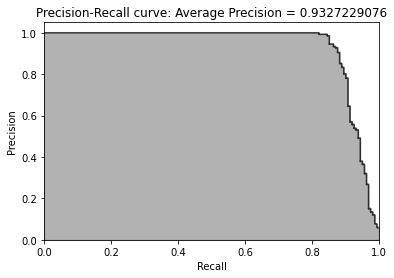

In [106]:
PR(TSy, TSOUT['phglm'])

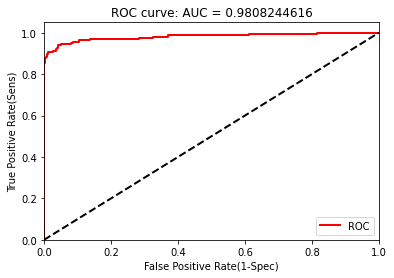

In [107]:
ROC(TSy, TSOUT['phglm'])

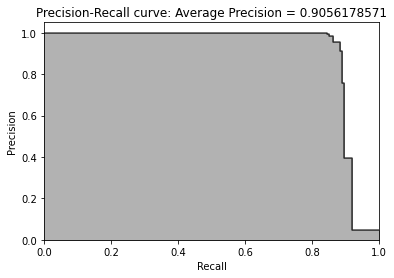

In [108]:
PR(TSy, TSOUT['phrf'])

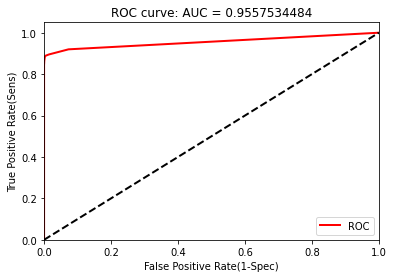

In [109]:
ROC(TSy,TSOUT['phrf'])

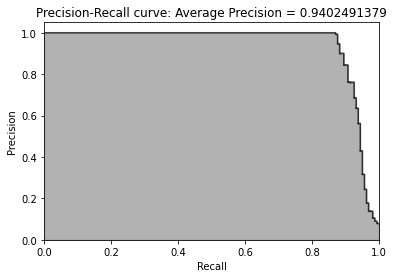

In [110]:
PR(TSy, TSOUT['phxgb'])

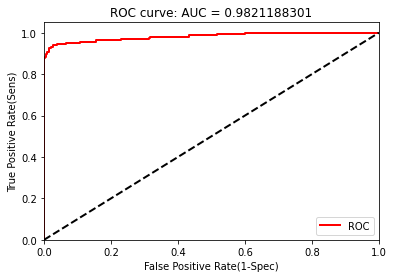

In [111]:
ROC(TSy, TSOUT['phxgb'])

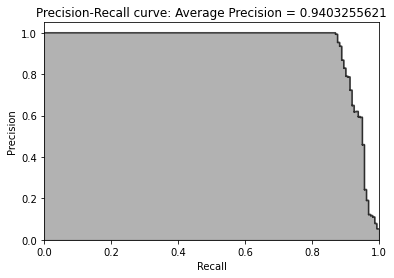

In [112]:
PR(TSy, TSOUT['phlgb'])

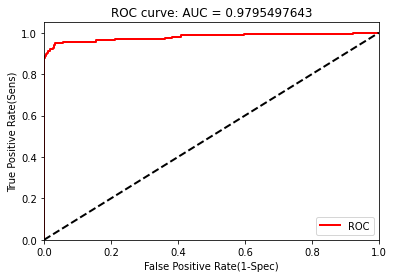

In [113]:
ROC(TSy, TSOUT['phlgb'])

In [114]:
MET = pd.concat([METglm, METrf, METxgb, METlgb], axis=0)

In [115]:
MET[MET['TRTS']=='TS'].sort_values(by='prec', ascending=False)

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec,model,TRTS
xgb,0.037745,0.982119,0.940249,3137,1,20,142,0.993636,0.931148,0.927825,0.876543,0.999681,0.993007,xgb,TS
lgb,0.040550,0.979550,0.940326,3137,1,20,142,0.993636,0.931148,0.927825,0.876543,0.999681,0.993007,lgb,TS
rf,0.152726,0.955753,0.905618,3137,1,24,138,0.992424,0.916944,0.912999,0.851852,0.999681,0.992806,rf,TS
glm,0.148580,0.980824,0.932723,3046,92,14,148,0.967879,0.736318,0.719900,0.913580,0.970682,0.616667,glm,TS


TRTS
TR    AxesSubplot(0.125,0.125;0.775x0.755)
TS    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

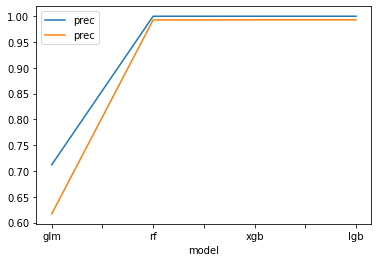

In [116]:
fig, ax = plt.subplots()
MET[MET['TRTS'].isin(['TR', 'TS'])].groupby('TRTS').plot(x='model', y=['prec'], ax=ax)

TRTS
TR    AxesSubplot(0.125,0.125;0.775x0.755)
TS    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

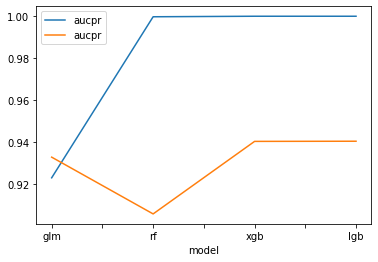

In [117]:
fig, ax = plt.subplots()
MET[MET['TRTS'].isin(['TR', 'TS'])].groupby('TRTS').plot(x='model', y=['aucpr'], ax=ax)

TRTS
TR    AxesSubplot(0.125,0.125;0.775x0.755)
TS    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

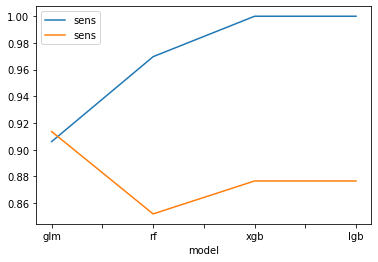

In [118]:
fig, ax = plt.subplots()
MET[MET['TRTS'].isin(['TR', 'TS'])].groupby('TRTS').plot(x='model', y=['sens'], ax=ax)

TRTS
TR    AxesSubplot(0.125,0.125;0.775x0.755)
TS    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

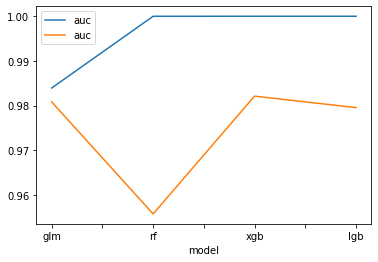

In [119]:
fig, ax = plt.subplots()
MET[MET['TRTS'].isin(['TR', 'TS'])].groupby('TRTS').plot(x='model', y=['auc'], ax=ax)

TRTS
TR    AxesSubplot(0.125,0.125;0.775x0.755)
TS    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

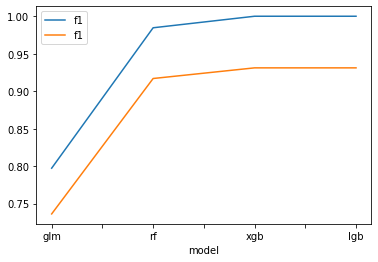

In [120]:
fig, ax = plt.subplots()
MET[MET['TRTS'].isin(['TR', 'TS'])].groupby('TRTS').plot(x='model', y=['f1'], ax=ax)

In [121]:
## Ensemble ##

In [122]:
CVOUT.head()

,Class,phglm,yhglm,phrf,yhrf,phxgb,yhxgb,phlgb,yhlgb
135,0,0.028957,0,0.0,0,0.000009,0,0.000001,0
5398,0,0.016475,0,0.0,0,0.000010,0,0.000002,0
8946,0,0.106350,0,0.0,0,0.000341,0,0.000117,0
5186,0,0.353161,0,0.0,0,0.000634,0,0.001376,0
8735,0,0.042866,0,0.0,0,0.000058,0,0.000026,0


In [123]:
TROUT.head()

,Class,phglm,yhglm,phrf,yhrf,phxgb,yhxgb,phlgb,yhlgb
135,0,0.029303,0,0.0,0,0.000011,0,0.000004,0
5398,0,0.026806,0,0.0,0,0.000020,0,0.000002,0
8946,0,0.077800,0,0.0,0,0.000484,0,0.000101,0
5186,0,0.381615,0,0.0,0,0.000228,0,0.000491,0
8735,0,0.055274,0,0.0,0,0.000111,0,0.000018,0


In [124]:
TRXPH = TRX.merge(CVOUT[['phglm', 'phrf', 'phxgb', 'phlgb']], left_index=True, right_index=True)
TRXPH

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,phglm,phrf,phxgb,phlgb
135,163928,0.911911,-0.290927,-0.719408,-0.643386,0.313629,-0.413536,0.210308,-0.211400,-0.799773,...,0.534222,0.514841,0.279611,-0.143459,-0.206017,-0.299673,0.028957,0.0,0.000009,0.000001
5398,145509,0.870468,-0.276830,-0.855836,-0.619742,0.500807,-0.335320,0.315232,-0.147535,0.413927,...,-0.038094,0.626083,2.198254,-0.349011,-0.268404,-0.173435,0.016475,0.0,0.000010,0.000002
8946,119086,0.615095,-0.990122,0.335476,0.455274,-0.991035,0.413459,-0.462116,0.165145,2.160164,...,0.076303,-1.019949,1.465345,-0.058495,-0.004220,0.759142,0.106350,0.0,0.000341,0.000117
5186,158368,0.096736,0.542163,-0.325806,-0.178398,1.118318,-0.246195,0.769410,-0.066011,-0.427300,...,0.137067,-0.934220,-1.667954,0.469081,0.677803,-0.394557,0.353161,0.0,0.000634,0.001376
8735,52006,0.538795,-0.840047,0.472253,-0.901479,-0.915225,0.131538,-0.532891,0.095228,-1.164103,...,-0.023714,-0.025122,-0.488476,0.072568,0.078197,0.118677,0.042866,0.0,0.000058,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,122630,-2.418558,-2.415546,-0.751515,-0.533341,1.926662,-1.637314,0.519280,-0.912575,1.323291,...,1.130520,1.772590,0.558623,-2.608171,0.194826,0.131616,0.030745,0.0,0.000583,0.000026
7020,68180,0.429174,-0.213404,0.270159,0.672198,-0.146571,0.076872,0.115420,0.071877,0.248418,...,0.354093,0.953777,-0.729203,-0.014208,0.043141,0.104833,0.143188,0.0,0.000151,0.000229
9750,170746,-0.544819,0.476978,-0.174577,-1.311260,0.931280,2.896701,-0.224643,0.822088,0.728192,...,1.256069,-0.508154,0.042059,-2.237115,-1.687921,-0.312828,0.000208,0.0,0.000021,0.000004
6964,44644,0.551135,-0.209937,0.297772,-0.142133,-0.235934,-0.176590,-0.057852,-0.050658,0.497896,...,-0.611210,0.613664,2.359574,-0.154790,0.012724,-0.166189,0.022207,0.0,0.000050,0.000098


In [125]:
params_lightGB = {'max_depth':4,
                  'learning_rate':0.01,
                  'bagging_seed': 2018,
                  'verbose':-1,
                  'n_jobs':16}

In [126]:
Elgb2 = lgb.LGBMClassifier(**params_lightGB, n_estimators=2000)
%time Elgb2.fit(TRXPH, TRy)
print(Elgb2.score(TRXPH, TRy))

Wall time: 2.46 s
1.0


In [127]:
CVOUT['phens']=cross_val_predict(Elgb2, TRXPH, TRy, cv=SKF5, method='predict_proba')[:,1]
CVOUT['yhens']=cross_val_predict(Elgb2, TRXPH, TRy, cv=SKF5)
CVOUT.head()

,Class,phglm,yhglm,phrf,yhrf,phxgb,yhxgb,phlgb,yhlgb,phens,yhens
135,0,0.028957,0,0.0,0,0.000009,0,0.000001,0,1.354976e-06,0
5398,0,0.016475,0,0.0,0,0.000010,0,0.000002,0,3.392794e-07,0
8946,0,0.106350,0,0.0,0,0.000341,0,0.000117,0,5.071743e-05,0
5186,0,0.353161,0,0.0,0,0.000634,0,0.001376,0,1.691953e-03,0
8735,0,0.042866,0,0.0,0,0.000058,0,0.000026,0,6.170406e-06,0


In [128]:
print('Feature importances:', list(Elgb2.feature_importances_))

Feature importances: [840, 590, 586, 765, 839, 374, 420, 994, 625, 499, 574, 975, 762, 295, 1128, 573, 787, 670, 473, 881, 491, 504, 756, 387, 417, 723, 659, 558, 566, 1132, 981, 766, 1548, 1582]


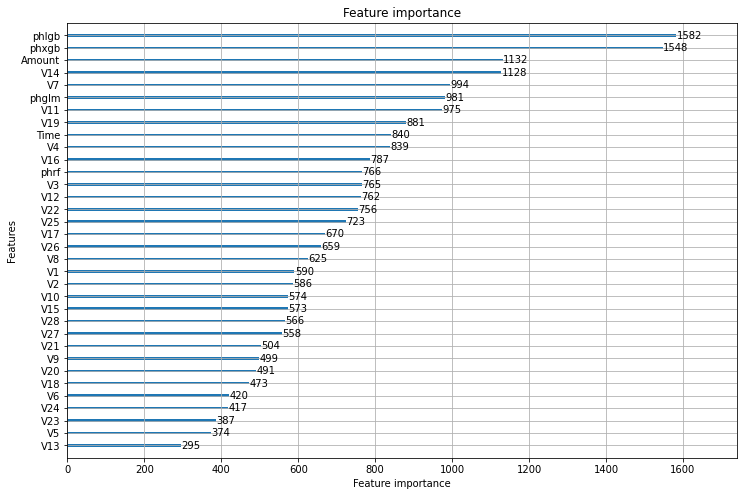

In [129]:
lgb.plot_importance(Elgb2, figsize=(12, 8));

In [130]:
TSOUT[['phglm', 'phrf', 'phxgb', 'phlgb']].corr()

,phglm,phrf,phxgb,phlgb
phglm,1.000000,0.831856,0.809396,0.804586
phrf,0.831856,1.000000,0.973677,0.973573
phxgb,0.809396,0.973677,1.000000,0.997277
phlgb,0.804586,0.973573,0.997277,1.000000


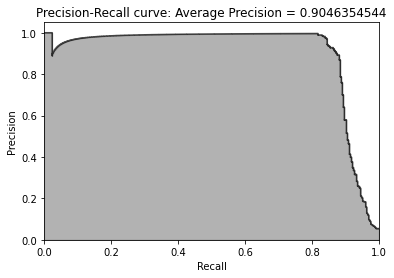

In [131]:
PR(TRy, CVOUT['phens'])

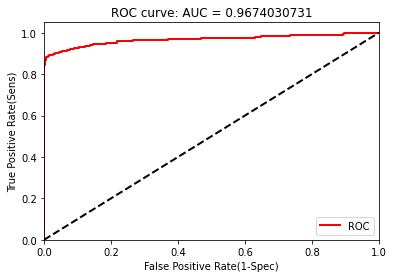

In [132]:
ROC(TRy, CVOUT['phens'])

In [133]:
## 최종 모형 ##

In [134]:
MET[MET['TRTS']=='CV'].sort_values(by='prec', ascending=False)

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec,model,TRTS
lgb,0.056949,0.971241,0.915305,6368,2,53,277,0.991791,0.909688,0.905420,0.839394,0.999686,0.992832,lgb,CV
rf,0.164242,0.954440,0.891883,6368,2,64,266,0.990149,0.889632,0.884535,0.806061,0.999686,0.992537,rf,CV
xgb,0.050125,0.975436,0.913465,6366,4,53,277,0.991493,0.906710,0.902283,0.839394,0.999372,0.985765,xgb,CV
glm,0.131985,0.974438,0.911436,6221,149,33,297,0.972836,0.765464,0.751388,0.900000,0.976609,0.665919,glm,CV


In [135]:
MET[MET['TRTS']=='TS'].sort_values(by='prec', ascending=False)

,logloss,auc,aucpr,tn,fp,fn,tp,acc,f1,kap,sens,spec,prec,model,TRTS
xgb,0.037745,0.982119,0.940249,3137,1,20,142,0.993636,0.931148,0.927825,0.876543,0.999681,0.993007,xgb,TS
lgb,0.040550,0.979550,0.940326,3137,1,20,142,0.993636,0.931148,0.927825,0.876543,0.999681,0.993007,lgb,TS
rf,0.152726,0.955753,0.905618,3137,1,24,138,0.992424,0.916944,0.912999,0.851852,0.999681,0.992806,rf,TS
glm,0.148580,0.980824,0.932723,3046,92,14,148,0.967879,0.736318,0.719900,0.913580,0.970682,0.616667,glm,TS


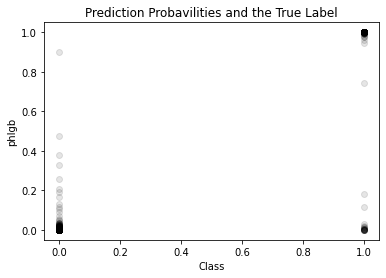

In [136]:
ax = sns.regplot(x='Class', y = 'phlgb', color='k',
                 fit_reg=False, scatter_kws={'alpha':0.1},
                 data=TSOUT).set_title('Prediction Probavilities and the True Label')

In [137]:
scatterDataMelted = pd.melt(TSOUT[['Class', 'phlgb']], 'Class', var_name='phlgb')
scatterDataMelted.head()

,Class,phlgb,value
0,0,phlgb,0.000483
1,0,phlgb,0.000006
2,0,phlgb,0.000129
3,0,phlgb,0.000058
4,0,phlgb,0.000109


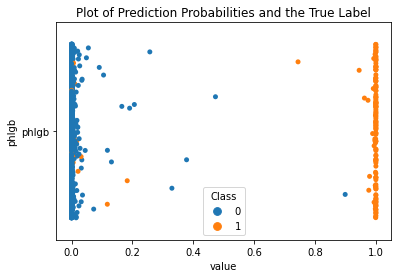

In [138]:
ax = sns.stripplot(x='value',
                  y='phlgb',
                  hue='Class',
                  jitter=0.4,
                  data=scatterDataMelted).set_title('Plot of Prediction Probabilities and the True Label')

In [139]:
print('---% seconds ---'%(time.time() - start_time))

---1038.4394359588623econds ---
